# Use Cases

In this notebook we will walk you through finding motiflets in multidimensional time series.

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

from motiflets.motiflets import *
from motiflets.plotting import *

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

# Magellanic Penguin

This use case originates from Zhu et al. [1], and contains telemetry gathered from a Magellanic penguin (Spheniscus magellanicus). It was collected using a compact multi-channel data-logging device attached to the bird, comprises a total of $1,048,575$ time stamps, recorded at 40 Hz, which is approximately 7.2 hours. The X-axis acceleration represents the direction of travel during swimming.

## References

[1] Yan Zhu, Makoto Imamura, Daniel Nikovski, and Eamonn Keogh. 2017. Matrix profile vii: Time series chains: A new primitive for time series data mining. In 2017 IEEE international conference on data mining (ICDM). IEEE, 695–704.

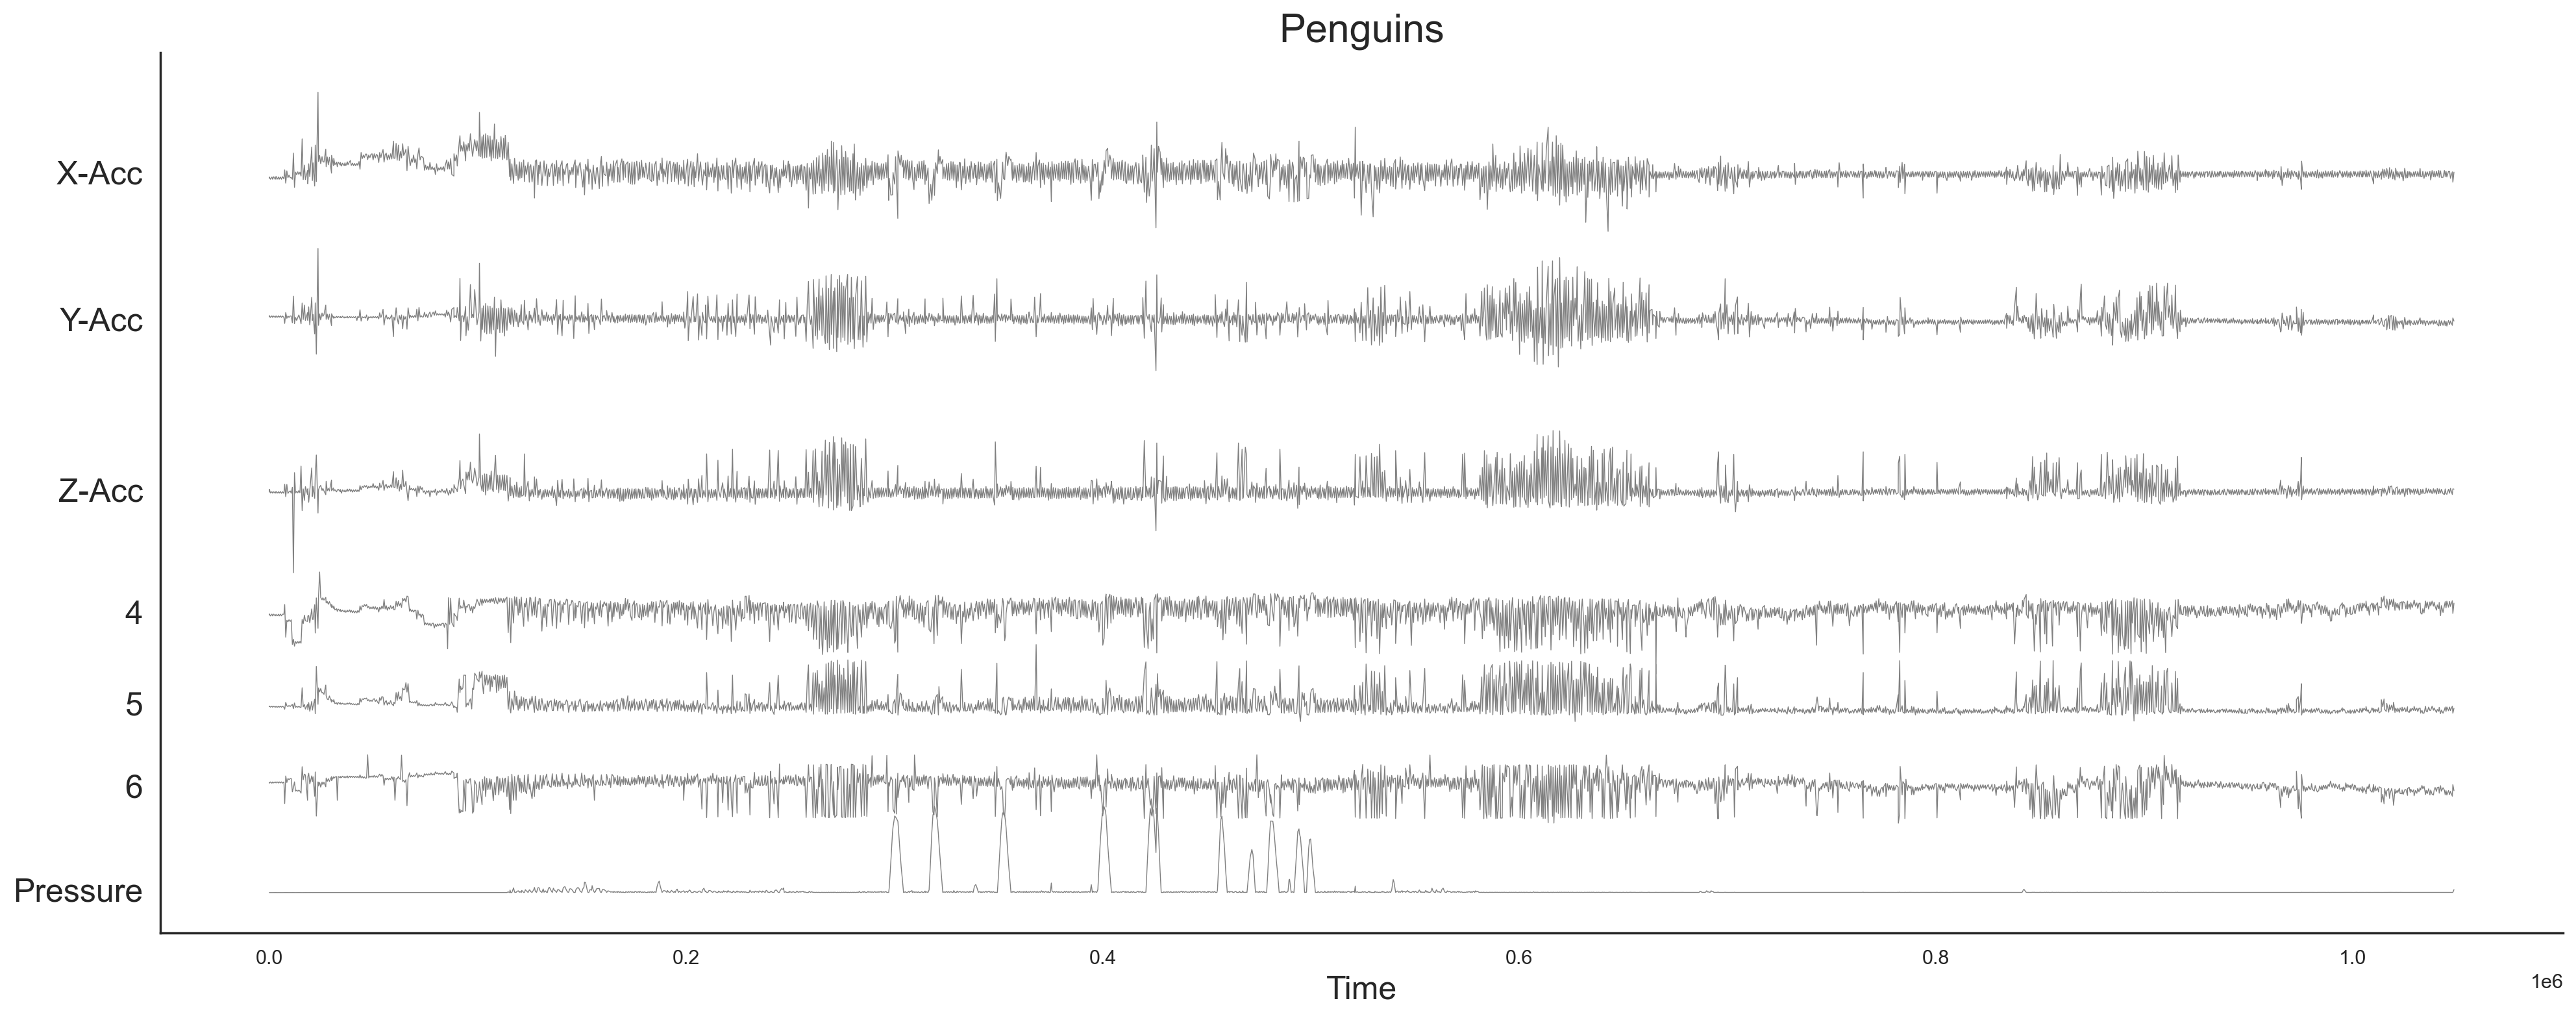

In [2]:
# Load datasaet
def read_penguin_data():
    path = "../datasets/experiments/"
    series = pd.read_csv(path + "penguin.txt",
                         names=(["X-Acc", "Y-Acc", "Z-Acc",
                                 "4", "5", "6",
                                 "7", "Pressure", "9"]),
                         delimiter="\t", header=None)
    ds_name = "Penguins"

    return ds_name, series
    
ds_name, TS = read_penguin_data()
series = TS.iloc[:, [0, 1, 2, 3, 4, 5, 7]].T

# Plot Dataset
_ = plot_dataset(ds_name, series)

# Finding Motifsets in Telemetry Data

Here, we focus on two subsets of the data, each about $50$ seconds, during which the Penguin (a) first dives to its hunting ground, indicated by an increase of pressure, (b) followed by hunting.    

For each, we see three plots: 

1. Length plot: The *optimal motif lengths* found
2. Elbow-plot: The *largest motif set* of the optimal motif length
3. Motiflet: The position of the motif set in the time series

# Start of the dive

The penguin starts to dive into the hunting ground, indicated by increase of pressure. The motif set is a regular stroke with $35$ repeats of length $23$. 

Using backend: scalable
Using backend: scalable
Using backend: scalable
Using backend: scalable
Using backend: scalable
Using backend: scalable
Using backend: scalable
Using backend: scalable
Using backend: scalable
Using backend: scalable
	Time 14.6 s


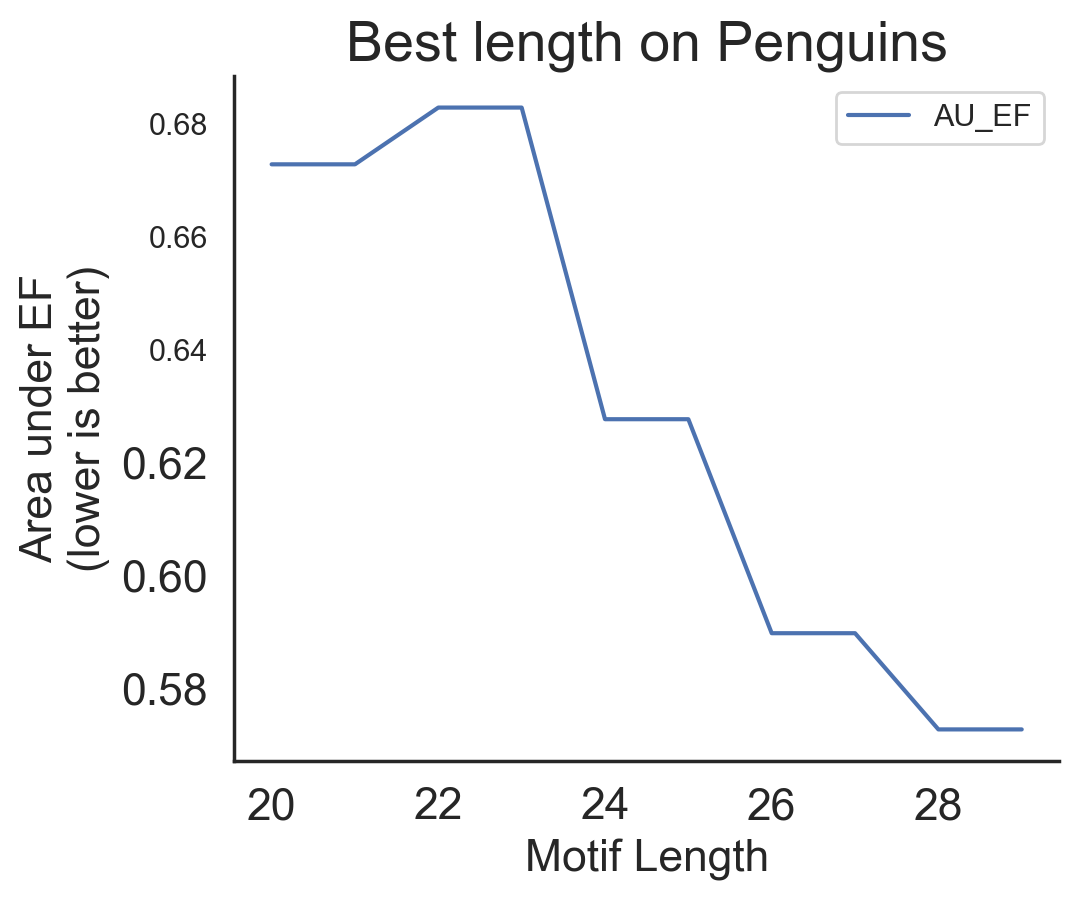

Using backend: scalable
Found motiflets in 1.2 s
	Elbow Points [ 3 38]


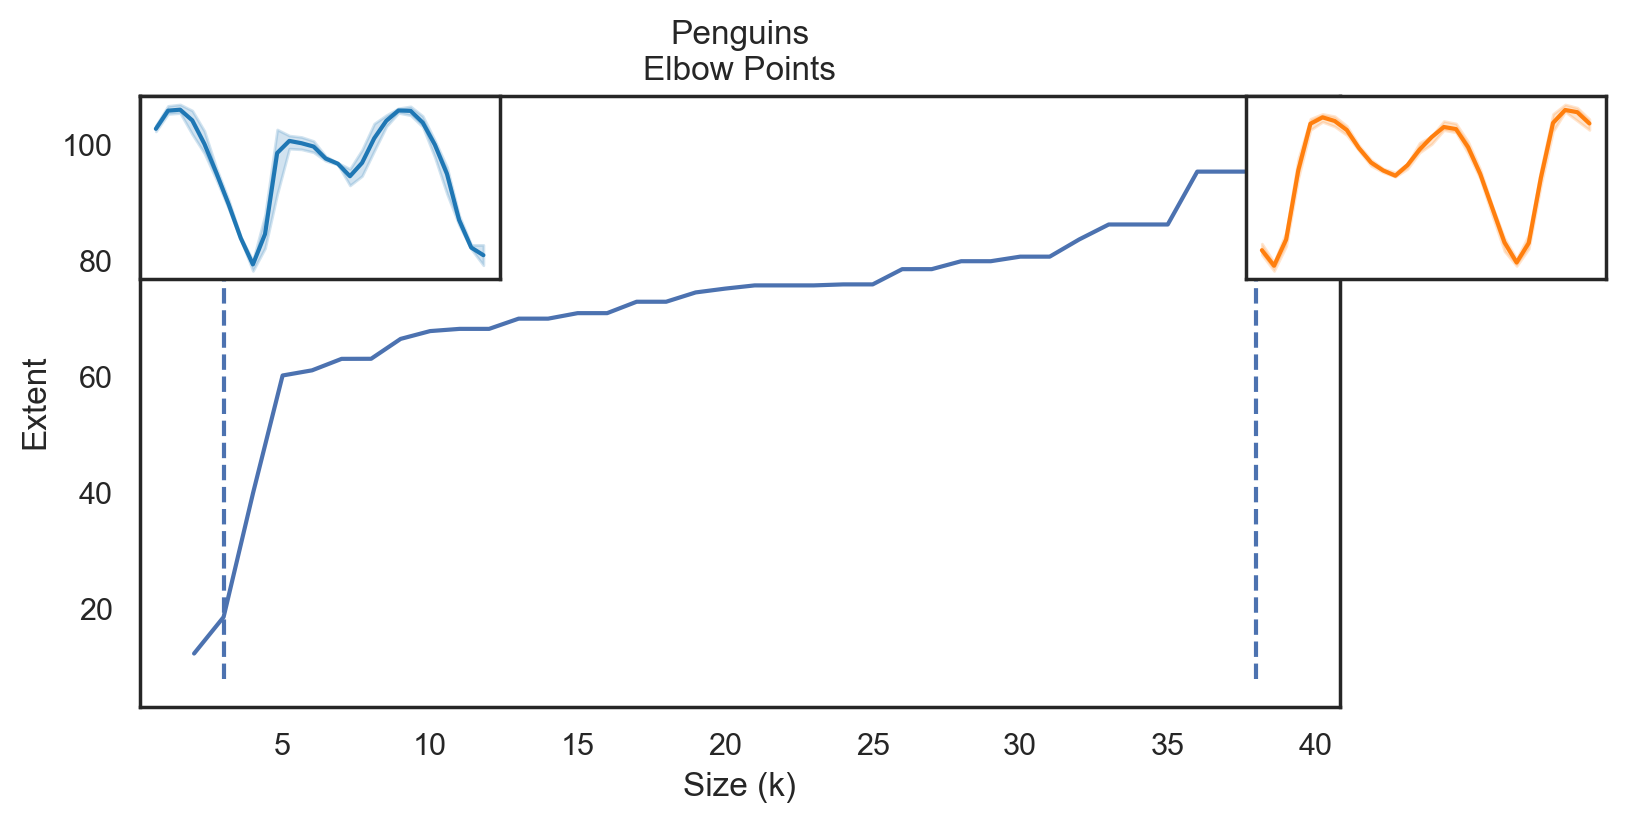

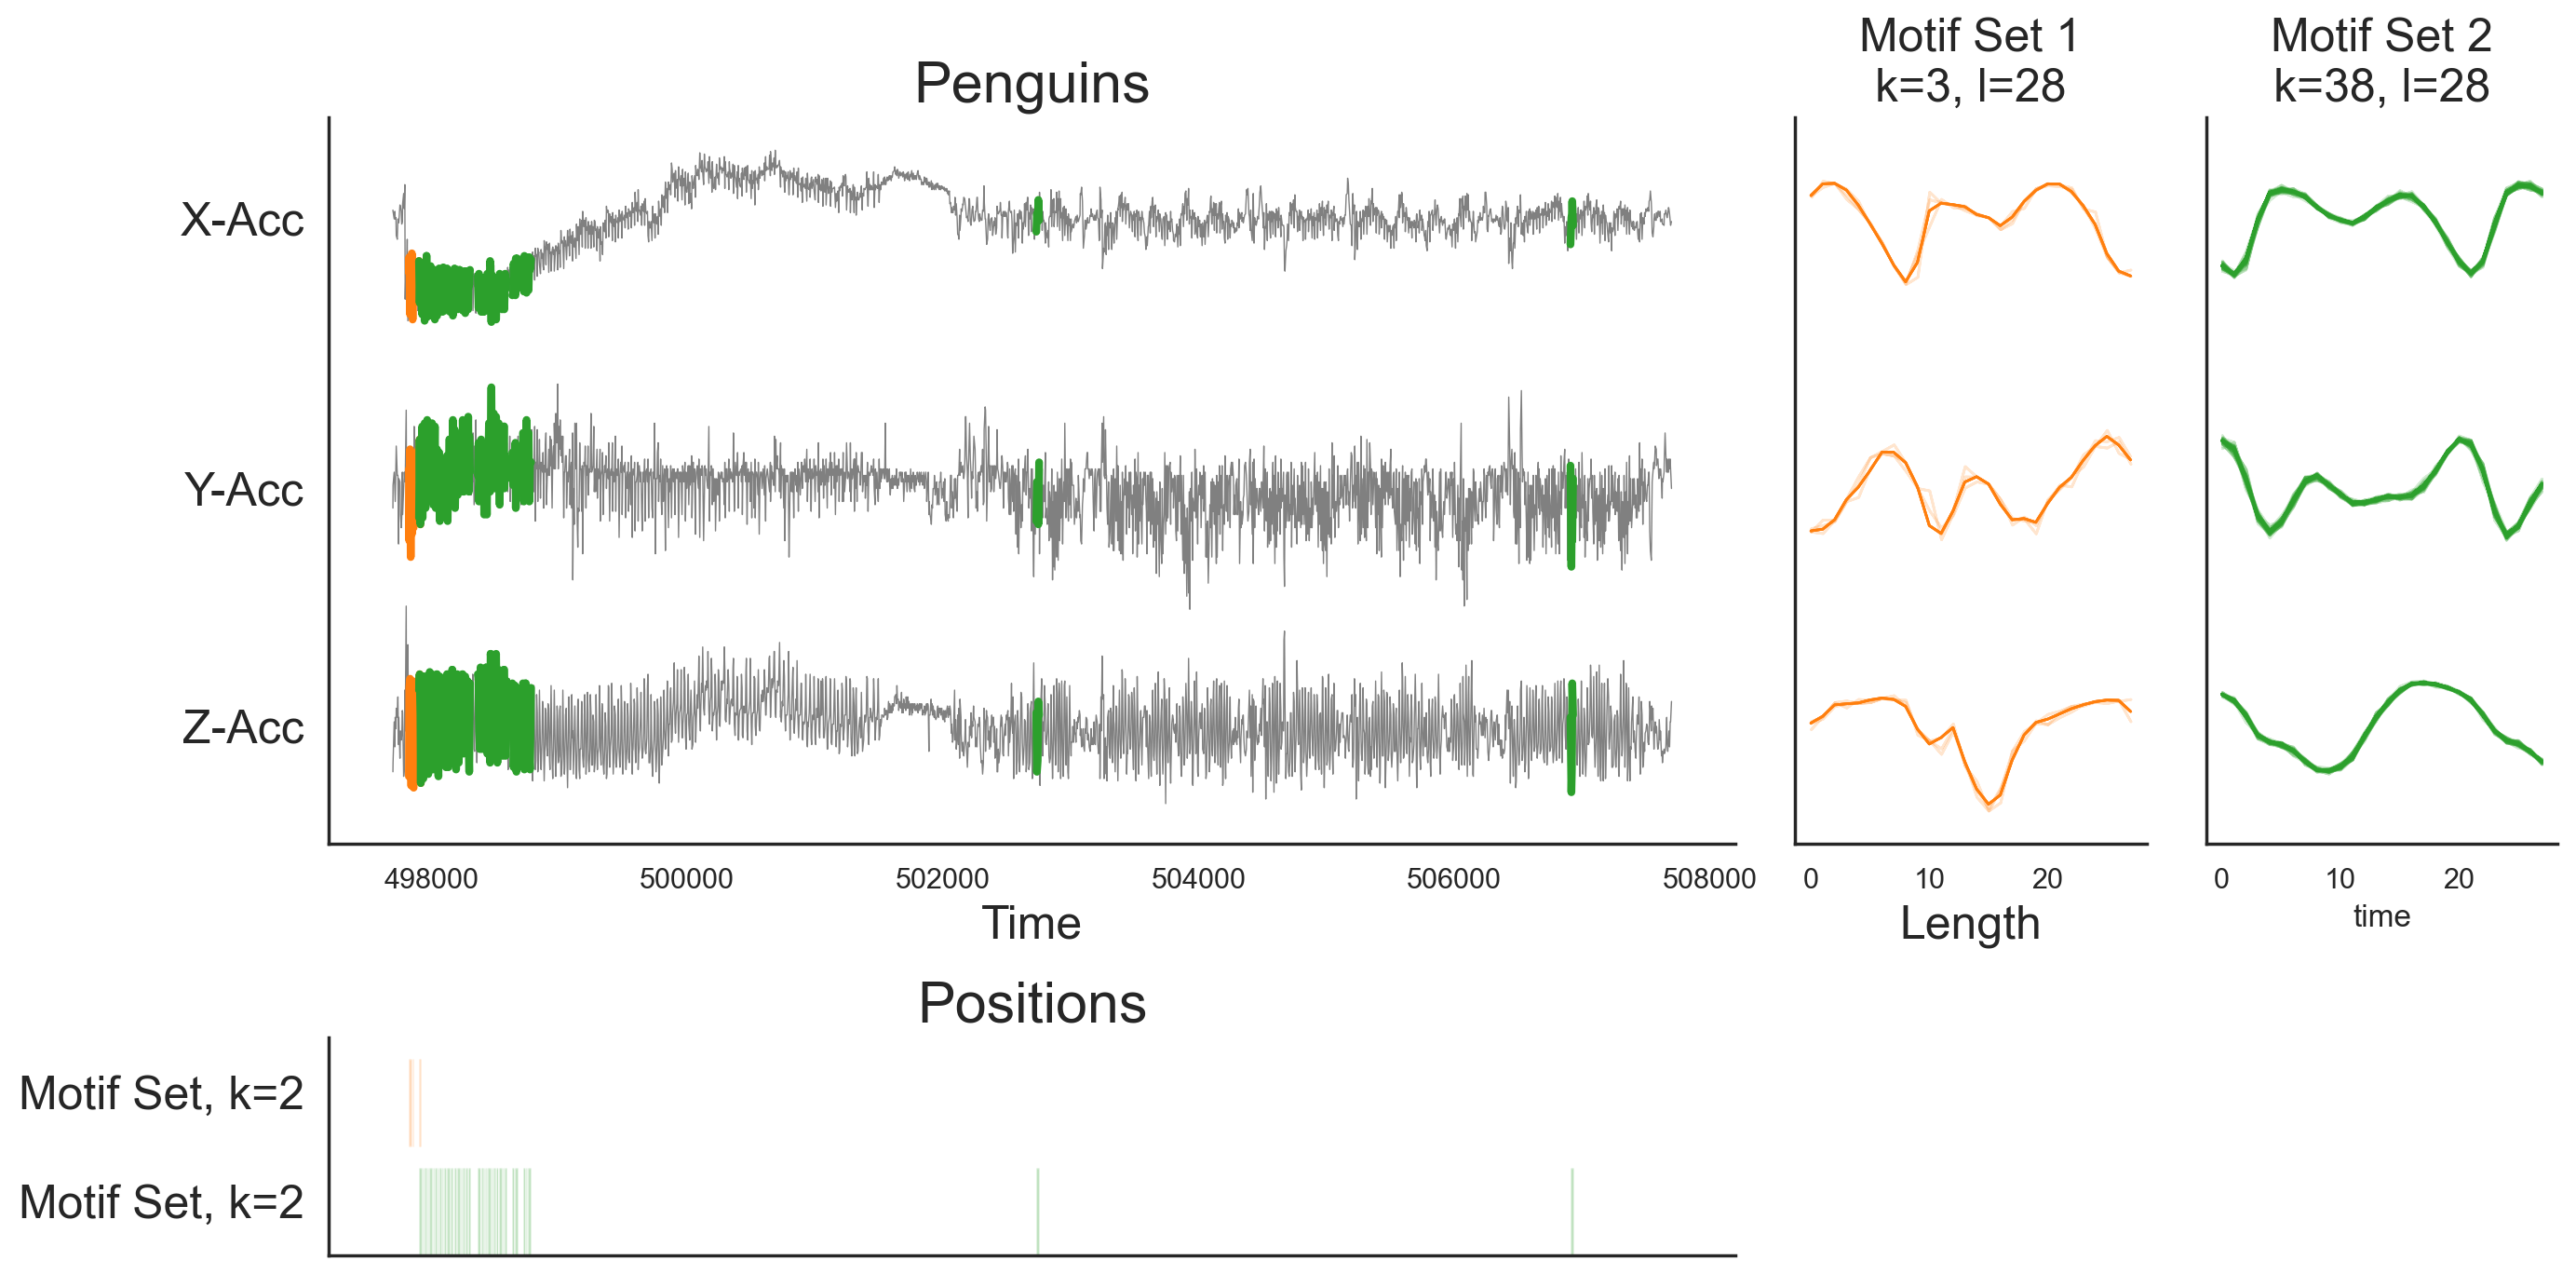

In [3]:
length = 10_001
start = 0
series = TS.iloc[497699 + start:497699 + start + length, [0, 1, 2]].T

# Input Parameters
k_max = 40     # expected number of repeats
motif_length_range = np.arange(20, 30, 1)   # motiflet length range


# initialize LAMA
ml = Motiflets(
    ds_name,  
    series,
    n_jobs=8    # number of parallel jobs
)

l = ml.fit_motif_length(
    k_max,
    motif_length_range,
)    

# l = 22
dists, motiflets, elbow_points = ml.fit_k_elbow(
    k_max, 
    motif_length=l    
)

# Hunting

Shortly into the dive, the penguin reached its hunting ground, indicated by decrease in pressure. A different motif set emerges, equal to a stroke and a glide with $24$ repeats and shorter length $l=21$. 

	Time 9.6 s


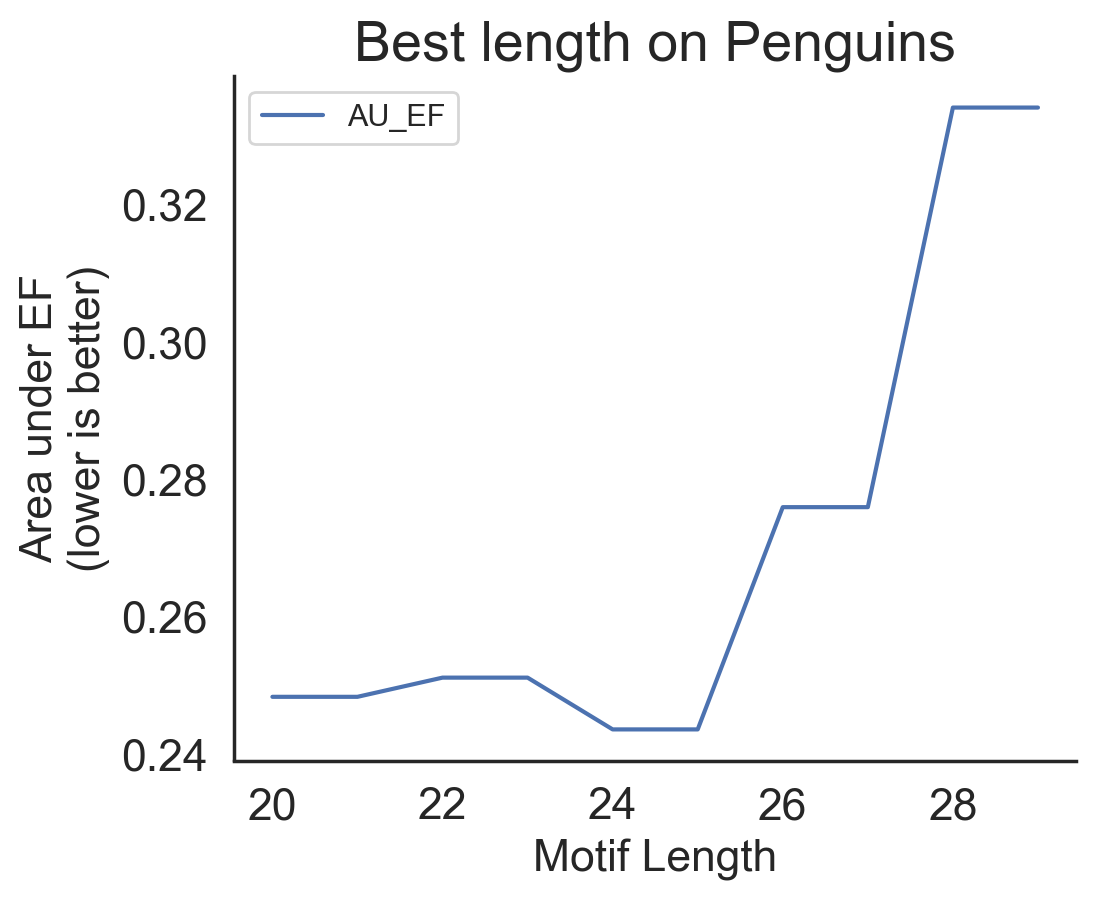

Found motiflets in 0.6 s
	Elbow Points [24]


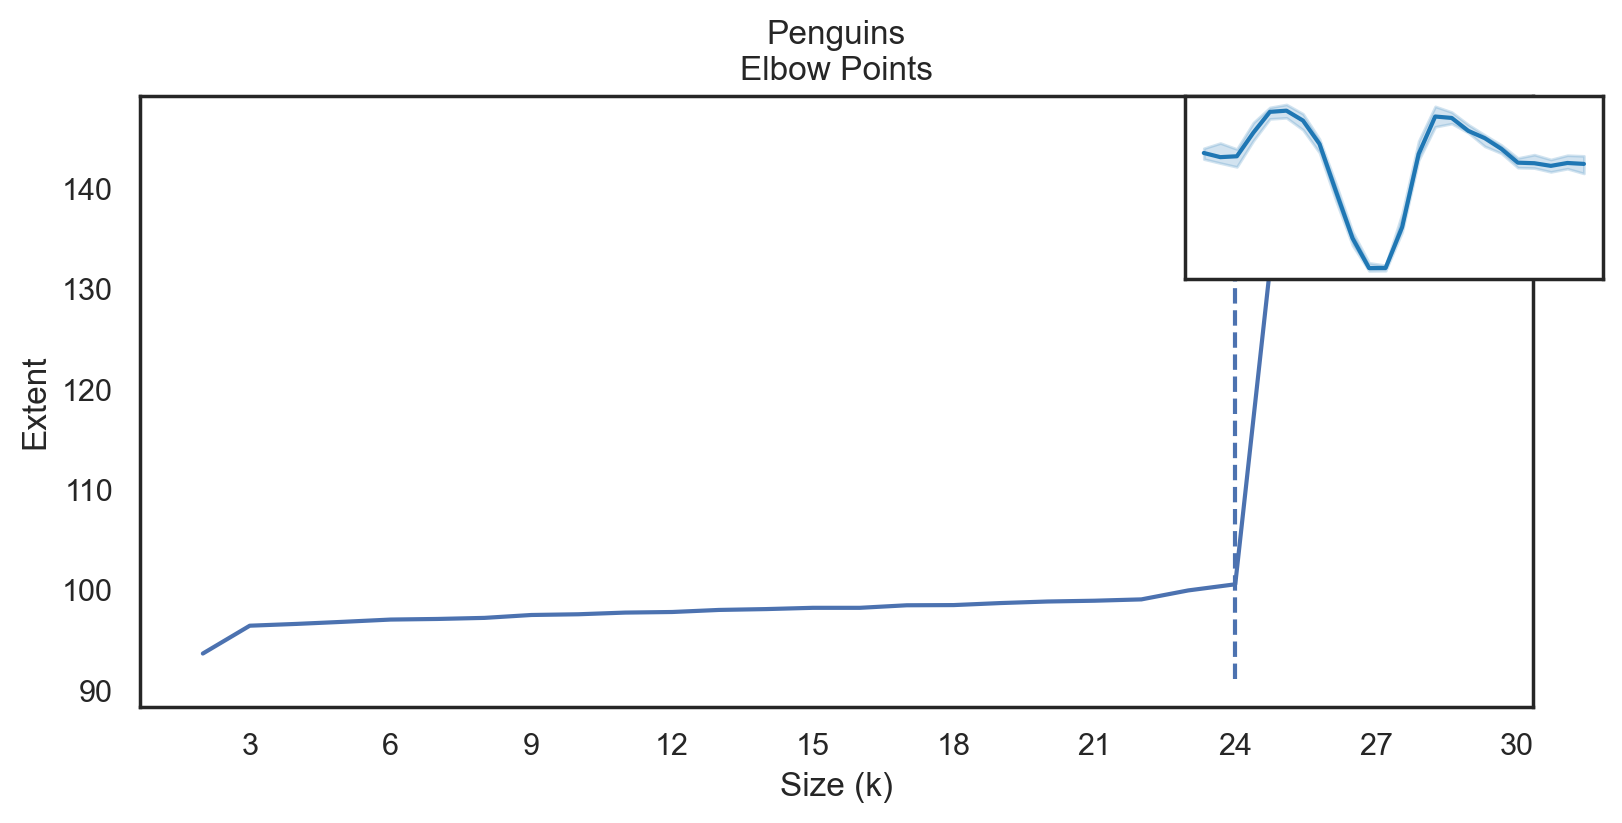

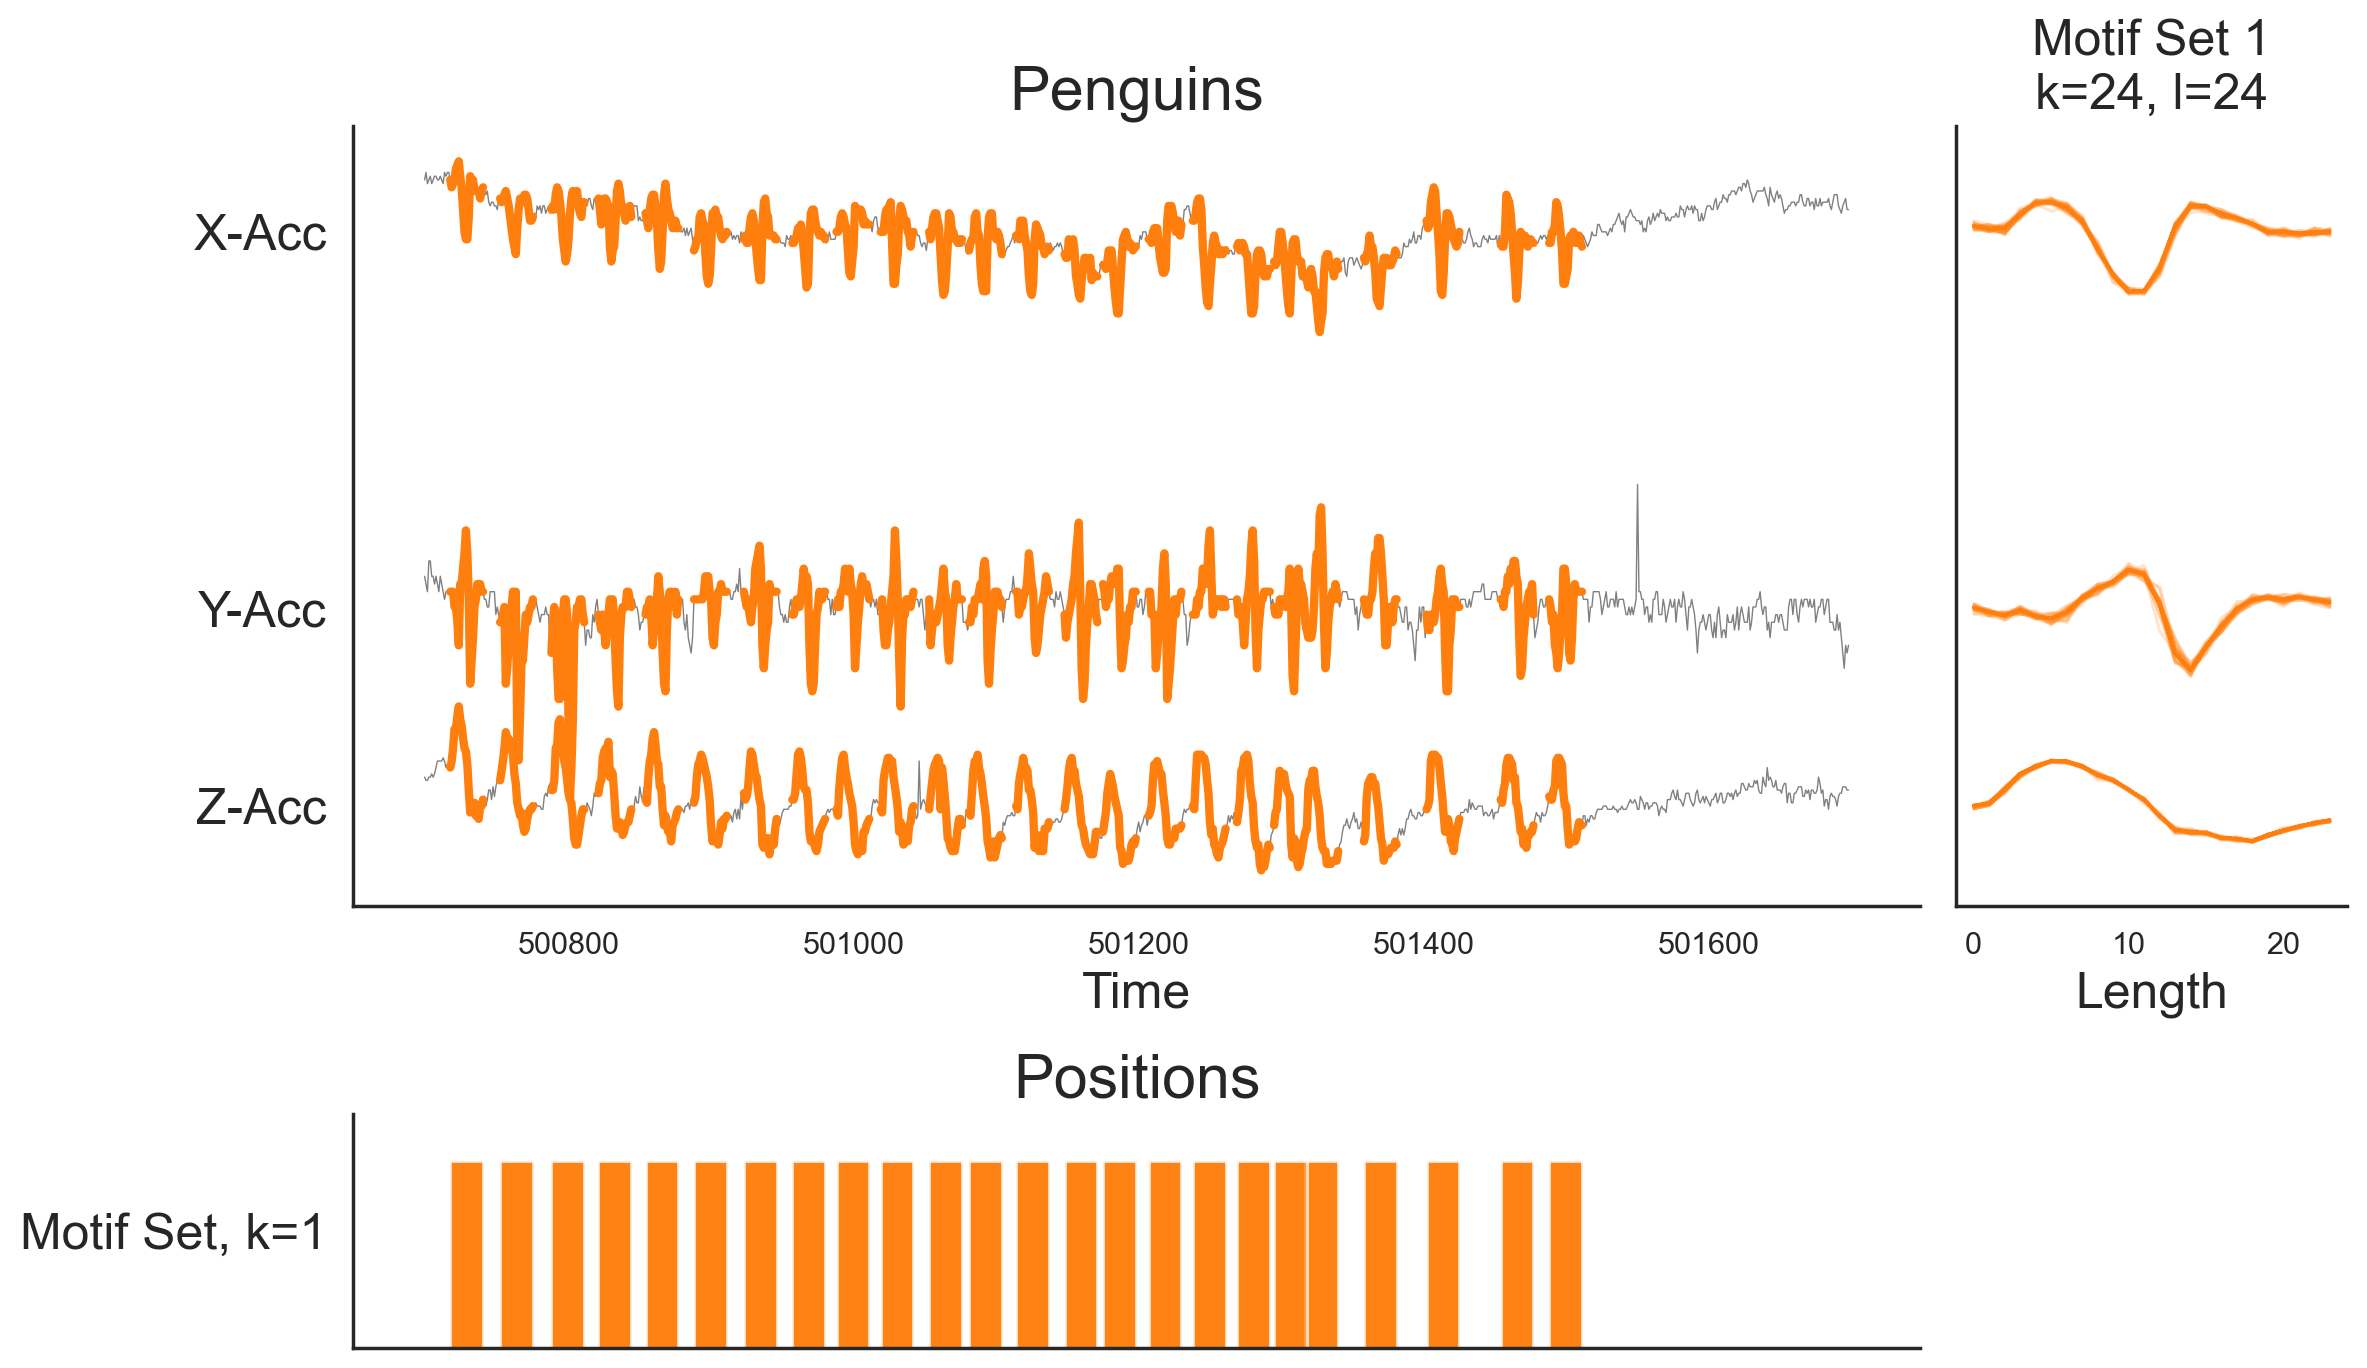

In [4]:
length = 1_000
start = 3000
series = TS.iloc[497699 + start:497699 + start + length, [0, 1, 2]].T

# Input Parameters
k_max = 30     # expected number of repeats
motif_length_range = np.arange(20, 30, 1)   # motiflet length range


# initialize 
ml = Motiflets(
    ds_name,  
    series,
    n_jobs=8,    # number of parallel jobs
)

l = ml.fit_motif_length(
    k_max,
    motif_length_range,
)    

dists, motiflets, elbow_points = ml.fit_k_elbow(
    k_max, 
    motif_length=l    
)